# Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from artlib import FusionART, FuzzyART


# Dataset Generation
TODO

In [2]:
data, target = make_blobs(n_samples=150, centers=3, cluster_std=0.50, random_state=0, shuffle=False)
print("Data has shape:", data.shape)

data_channel_a = data[:,0].reshape((-1,1))
data_channel_b = data[:,1].reshape((-1,1))


Data has shape: (150, 2)


## Clustering with Fusion Art

TODO

Prepared data has shape: (150, 4)
3 clusters found


/home/thomas/Documents/AdaptiveResonanceLib/artlib/common/BaseART.py:591: UserWarning: FusionART does not support plotting cluster bounds.
  warn(f"{self.__class__.__name__} does not support plotting cluster bounds.")


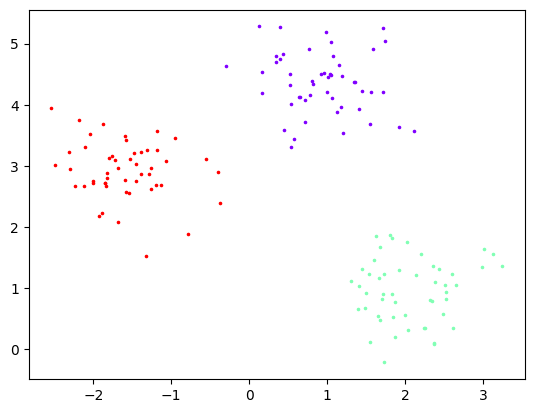

In [3]:
params = {
"rho": 0.5,
"alpha": 0.0,
"beta": 1.0
}

art_a = FuzzyART(**params)
art_b = FuzzyART(**params)
cls = FusionART([art_a, art_b], gamma_values=np.array([0.5, 0.5]), channel_dims=[2,2])

X_channel_a = art_a.prepare_data(data_channel_a)
X_channel_b = art_b.prepare_data(data_channel_b)

X = cls.join_channel_data(channel_data=[X_channel_a, X_channel_b])
print("Prepared data has shape:", X.shape)

y = cls.fit_predict(X)

print(f"{cls.n_clusters} clusters found")

cls.visualize(data, y)
plt.show()
